# Predicting Heart Disease using Machine Learning<hr>

This Notebool looks into various useful python-based Machine Learning and Data Sceince libraries in an attempt to build a machine learning model capable of predicting wheather or not someone has heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given medical parameters about a patient, can we predict wheather or not they have heart disease?

## 2. Data

The original data came from cleaveland data from the UCI Machine learning repository.
[Heart Disease - UCI Machine Learngin Repository](https://archive.ics.uci.edu/dataset/45/heart+disease)

There is also a version of it available on Kaggle.
[UCI Heart Disease Data | Kaggle](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## 3. Evaluation

> If we reach 95% accuracy at prediction wheather or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

The dataset includes the following attributes:

- id: Unique identifier for each patient
- age: Age of the patient in years
- origin: Place of study (location)
- sex: Gender of the patient (Male/Female)
- cp: Chest pain type:
    - typical angina
    - atypical angina
    - non-anginal
    - asymptomatic
- trestbps: Resting blood pressure (mm Hg on hospital admission)
- chol: Serum cholesterol level in mg/dl
- fbs: Fasting blood sugar (if fasting blood sugar > 120 mg/dl)
- restecg: Resting electrocardiographic results:
    - normal
    - st-t abnormality
    - lv hypertrophy
- thalach: Maximum heart rate achieved
- exang: Exercise-induced angina (True/False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of the peak exercise ST segment
- ca: Number of major vessels (0–3) colored by fluoroscopy
- thal: Thalassemia type:
    - normal
    - fixed defect
    - reversible defect
- num: Target variable (>=1 = Disease, 0 = No disease)

## Preparing the Tools
We're going to use Pandas, Numpy and Matplotlib for Data analysis and Manipulation and Scikit-Learn for modelling.

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load Data

In [2]:
data = pd.read_csv("data/heart_disease.csv")
data.shape

(303, 14)

### Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


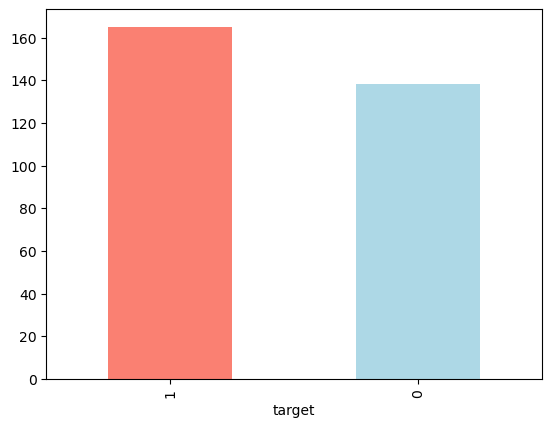

In [4]:
# Let's vusualize and find out how many of each class there
data["target"].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to *Sex*

In [8]:
data["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Compare Target column with the sex Column
pd.crosstab(data['target'], data['sex'])

sex,0,1
target,,
0,24,114
1,72,93


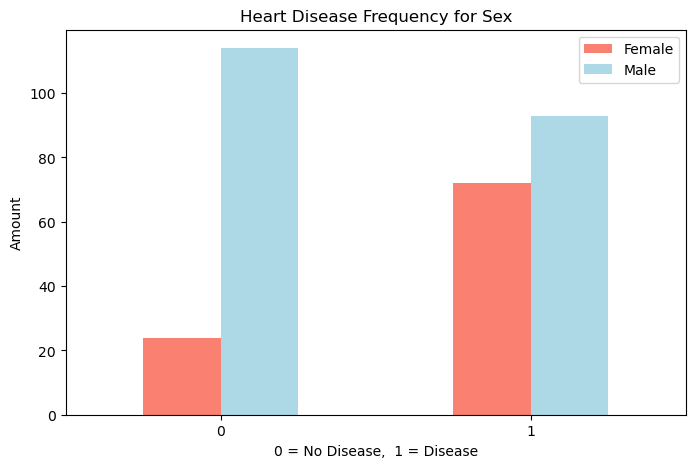

In [10]:
# Create a plot of the crosstab (Target and Sex)
pd.crosstab(data['target'], data['sex']).plot(kind='bar', figsize=(8, 5), color=['salmon', 'lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease,  1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

plt.show()

### Age *versus* Max Heart Rate (thalach) for Heart Disease

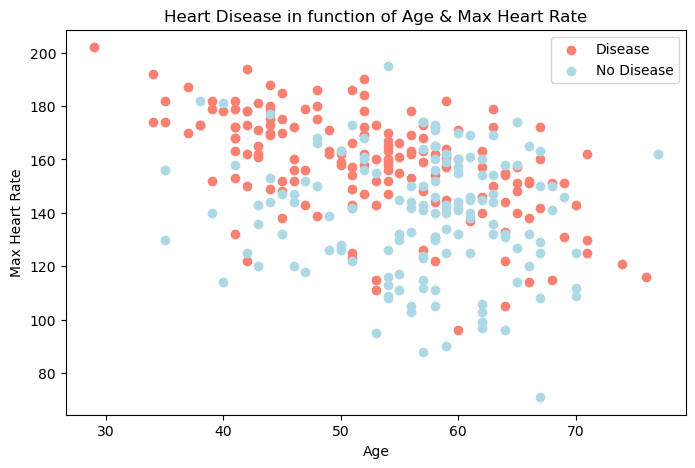

In [11]:
plt.figure(figsize=(8, 5))

# Scatter with Positive Examples
plt.scatter(data[data['target'] == 1]['age'],
            data[data['target'] == 1]['thalach'],
            c='salmon')

# Scatter with negative Exmaples
plt.scatter(data[data['target'] == 0]['age'],
            data[data['target'] == 0]['thalach'],
            c='lightblue')

plt.title("Heart Disease in function of Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease', 'No Disease'])

plt.show()

### Age Distribution

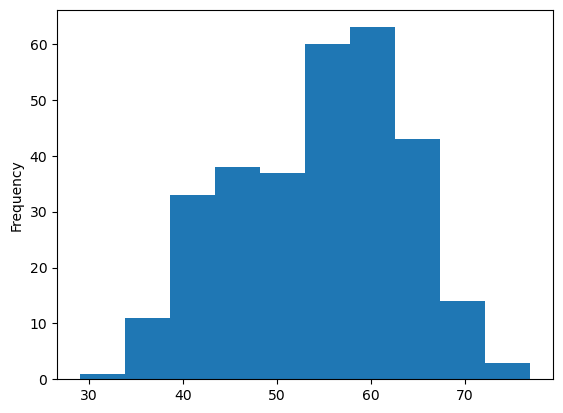

In [12]:
# Check the Distributiono of the Age column with a Histogram
data['age'].plot.hist()

plt.show()

### Heart Disease Frequency per Chest Pain type

cp: Chest pain type:
- 0: Typical angina - Chest pain related decrease blood supply to the Heart
- 1: Atypical angina - Chest pain not related to Heart
- 2: Non-anginal pain - Typical esophageal spasms (non heart related)
- 3: Asymptomatic - Chest pain not showing signs of Disease

In [13]:
pd.crosstab(data['cp'], data['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


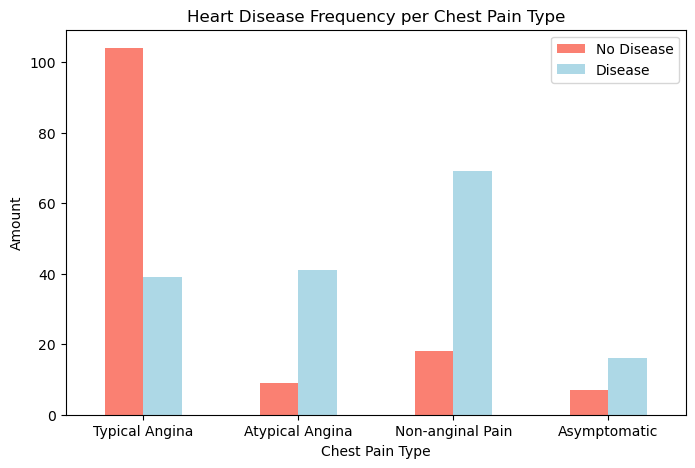

In [14]:
# Make the crosstab more visual
pd.crosstab(data['cp'], data['target']).plot(kind='bar', figsize=(8, 5), color=['salmon', 'lightblue'])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.xticks(np.arange(4), ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.xticks(rotation=0)
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

plt.show()

### Correlation Matrix of Heart Disease Data

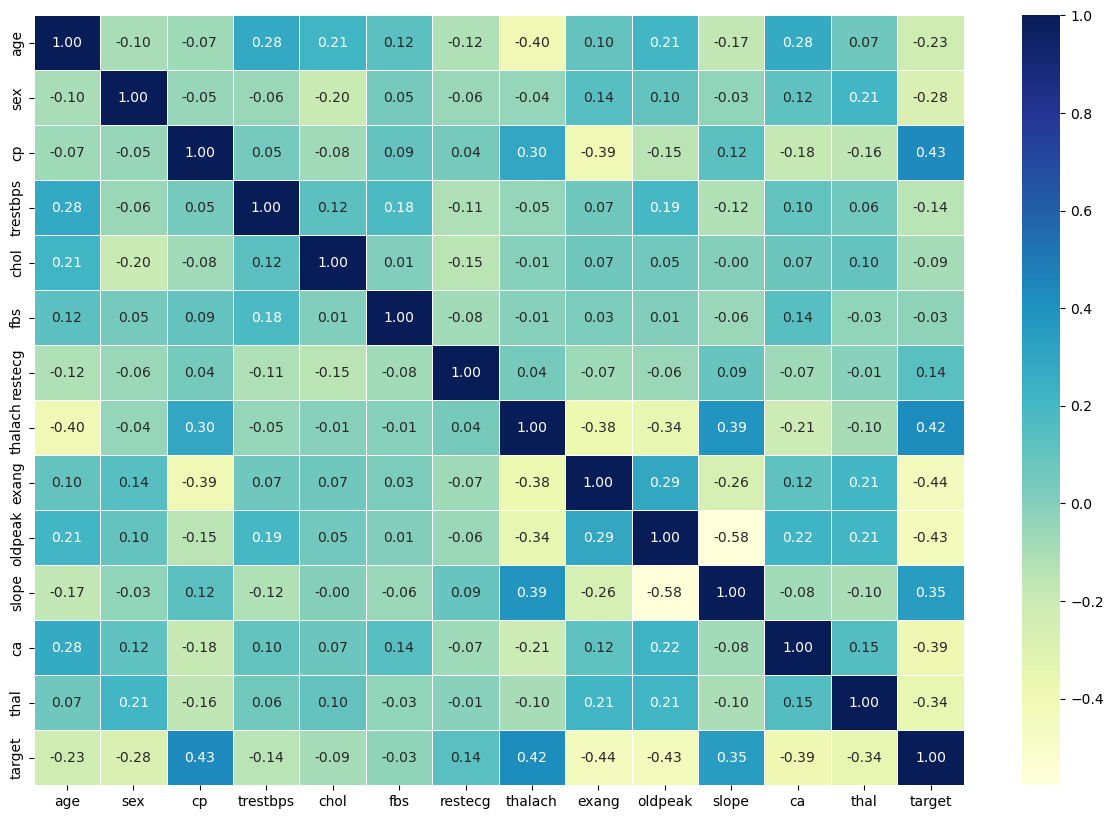

In [15]:
# Correlation matrix for our haert disease data
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(data.corr(),
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

plt.show()

## 5. Modelling

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Splitting our Data

In [17]:
# Splitting our data into X (Features) and y (Labels)

# Features
X = data.drop('target', axis=1)

# Labels
y = data['target']

In [18]:
# Splitting Features and Labels into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a Machine Learning model.

We'll train it (find the patterns) on the Training set.

And we'll test it (use the patterns) on the Test set.

We're going to try different Machine Learning Models-
- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest Classifier
- Cat Boost Classifier
- XG Boost Classifier

In [19]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Cat Boost": CatBoostClassifier(),
    "XG Boost": XGBClassifier()
}

In [20]:
# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and scores the given models on the training and test data.

    Args:
        models (dict): a dictionary of different Machine Learning models
        X_train (dataframe): training features
        X_test (dataframe): testing features
        y_train (series): trianing labels
        y_test (series): testing labels

    Returns:
        model_scores (dict): A dictionary containing the model names and their respective scores.
    """

    # Make a dictionary to keep models scores
    model_scores = {}

    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and apend its score to the model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [21]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

e:\ML Coding\5. Classification Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.005621
0:	learn: 0.6881094	total: 134ms	remaining: 2m 14s
1:	learn: 0.6837235	total: 137ms	remaining: 1m 8s
2:	learn: 0.6789474	total: 141ms	remaining: 46.8s
3:	learn: 0.6743923	total: 145ms	remaining: 36.1s
4:	learn: 0.6692646	total: 149ms	remaining: 29.6s
5:	learn: 0.6652488	total: 152ms	remaining: 25.2s
6:	learn: 0.6617580	total: 156ms	remaining: 22.1s
7:	learn: 0.6578716	total: 160ms	remaining: 19.8s
8:	learn: 0.6534527	total: 164ms	remaining: 18s
9:	learn: 0.6486836	total: 167ms	remaining: 16.6s
10:	learn: 0.6443181	total: 170ms	remaining: 15.2s
11:	learn: 0.6409016	total: 173ms	remaining: 14.3s
12:	learn: 0.6370194	total: 177ms	remaining: 13.5s
13:	learn: 0.6329018	total: 181ms	remaining: 12.7s
14:	learn: 0.6288515	total: 185ms	remaining: 12.1s
15:	learn: 0.6245995	total: 189ms	remaining: 11.6s
16:	learn: 0.6212231	total: 192ms	remaining: 11.1s
17:	learn: 0.6172248	total: 196ms	remaining: 10.7s
18:	learn: 0.6130632	total: 199ms	remaining: 10.3s
19:	learn: 0

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.819672131147541,
 'Cat Boost': np.float64(0.8524590163934426),
 'XG Boost': 0.7377049180327869}

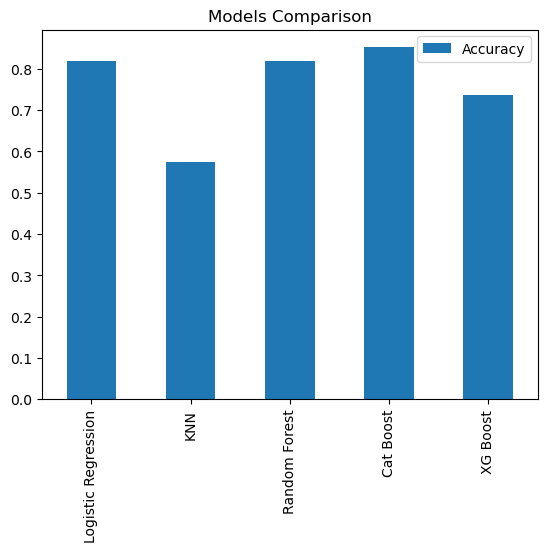

In [22]:
# Comparing the scores of each models visually
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar(title="Models Comparison")

plt.show()

Now we have got a baseline model and we know a model's first predictions arn't always what we should based out next steps off.

What we should do?

Let's look at the following:
* Hyperparameter tuning
* Feature Importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1-score
* Classification Report
* ROC curve
* Area Under the Curve (AUC)

## Hyperparameter Tuning (by Hand)
Let's tune K-Nearest Neighbors (KNN)

In [23]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithn
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [24]:
train_scores

[1.0,
 0.8140495867768595,
 0.7975206611570248,
 0.78099173553719,
 0.78099173553719,
 0.768595041322314,
 0.7479338842975206,
 0.7644628099173554,
 0.756198347107438,
 0.7355371900826446,
 0.7396694214876033,
 0.7272727272727273,
 0.7272727272727273,
 0.731404958677686,
 0.7396694214876033,
 0.743801652892562,
 0.731404958677686,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281]

In [25]:
test_scores

[0.5737704918032787,
 0.5409836065573771,
 0.5737704918032787,
 0.5245901639344263,
 0.5737704918032787,
 0.5081967213114754,
 0.5901639344262295,
 0.5573770491803278,
 0.5573770491803278,
 0.5409836065573771,
 0.5573770491803278,
 0.5737704918032787,
 0.5737704918032787,
 0.5409836065573771,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.5901639344262295,
 0.5901639344262295,
 0.5901639344262295]

Maximum KNN Score on the Test Data: 59.02%.


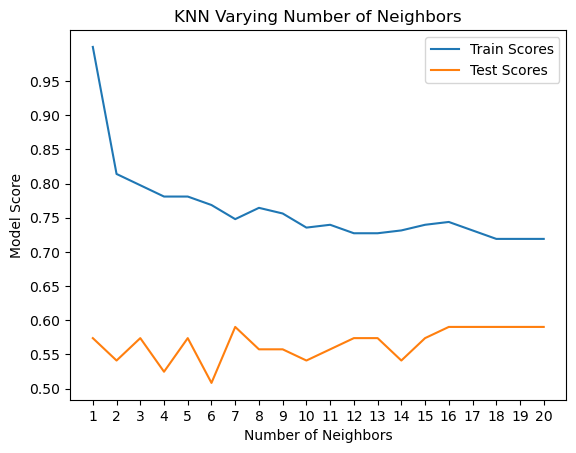

In [26]:
# Let's plot the scores
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1, 21, 1))
plt.yticks(np.arange(0.5, 1, 0.05))
plt.title("KNN Varying Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the Test Data: {max(test_scores)*100:.2f}%.")

plt.show()

## Hyperparameter Tuning (with RandomizedSearchCV)

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV.

In [27]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'penalty': ['l1', 'l2'],
                'max_iter': np.arange(1000, 2000, 100),
                'solver': ['liblinear'],
                'class_weight': [None, 'balanced']}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grid setups for each of our models, let's tune them using RandomizedSearchCV...

Tune LogisticRegression()

In [28]:
# Setup random hyperparameter search for LogisticRegression()
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2)

# Fit random hyperparameter search model for LogisticRegression()
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1100, penalty=l2, solver=liblinear; total time

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': array([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=2)

In [29]:
# find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': np.int64(1100),
 'class_weight': None,
 'C': np.float64(0.615848211066026)}

In [30]:
# find the score with best hyperparameters
rs_log_reg.score(X_test, y_test)

0.819672131147541

Now, we've tuned LogisticRegression(),

let's do the same for RandomForestClassifier()

In [31]:
# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2)

# Fit random hyperparameter serch model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=260; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=260; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=260; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=260; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=260; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=710; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=710; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=710; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=710; total time=   1.3s
[CV] END max_depth=10, min

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [32]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(60),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(19),
 'max_depth': 5}

In [33]:
# find the score with best hyperparameters
rs_rf.score(X_test, y_test)

0.819672131147541

## Hyperparameter Tuning (with GridSearchCV)

Since out LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [34]:
# Different hyperparameter grid for our LosgisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'penalty': ['l1', 'l2'],
                'max_iter': np.arange(1000, 2000, 100),
                'solver': ['liblinear'],
                'class_weight': [None, 'balanced']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)

# Fit grid hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'class_weight': [None, 'balanced'],
                         'max_iter': array([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=2)

In [35]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.615848211066026),
 'class_weight': None,
 'max_iter': np.int64(1000),
 'penalty': 'l2',
 'solver': 'liblinear'}

In [36]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.819672131147541

## Evaluating Tuned Classifier

Evaluating our tuned Machine learning Classifier, beyond Accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation used where possible

To make comaparisons and evaluate our trained model, first we need to make some predictions.

In [37]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

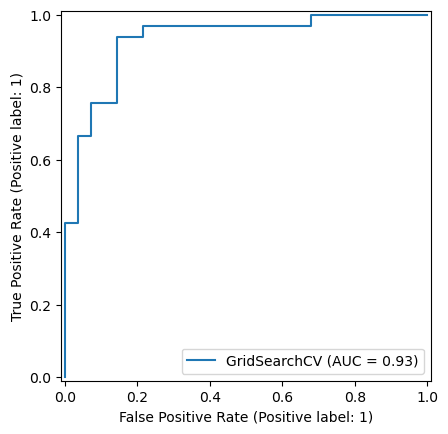

In [38]:
# Plot ROC curve and calculate AUC score
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

plt.show()

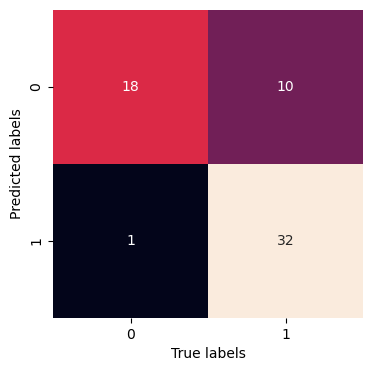

In [39]:
# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4))

ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=None)

ax.set(xlabel='True labels', ylabel='Predicted labels')

plt.show()

Now we've got a ROC Curve, an AUC score and a Confusion matrix, let's get a Classification report as well as corss-validated Precision, Recall and F1-score.

In [40]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



In [41]:
precision_score(y_test, y_preds)

0.7619047619047619

### Evluation Metrics using Cross-Validation

We're going to calculate Accuracy, Precision, Recall and F1-Score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [42]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.615848211066026),
 'class_weight': None,
 'max_iter': np.int64(1000),
 'penalty': 'l2',
 'solver': 'liblinear'}

In [43]:
# Create a new classifier with best hyperparameters
clf = LogisticRegression(C=0.615848211066026,
                         solver='liblinear',
                         max_iter=100)

In [44]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

cv_acc

np.float64(0.8249180327868852)

In [45]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision').mean()

cv_precision

np.float64(0.8122549019607843)

In [46]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall').mean()

cv_recall

np.float64(0.890909090909091)

In [47]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1').mean()

cv_f1

np.float64(0.8481221874318333)

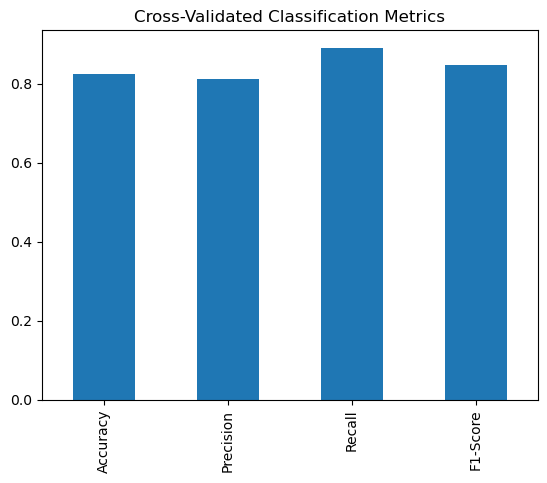

In [48]:
# Visualize the cross-validated metrics
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1-Score': cv_f1
}, index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics', legend=False)

plt.show()

### Feature Importance

Feature Importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each Machine Learning model. One way to find feature importance is to search for "[MODEL NAME] feature importance".

Let's find the feature importance for our LogisticRegression() model...

In [49]:
# Fit an instance of LogisticRegression()
clf = LogisticRegression(C=0.38566204211634725,
                         solver='liblinear',
                         max_iter=100)

clf.fit(X_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [50]:
# After some sort of research, coef_ is the attribute which contains the feature importance for LogisticRegression() model.
# Check coef_
clf.coef_

array([[-6.05773334e-04, -8.80408113e-01,  7.82088672e-01,
        -7.25591511e-03, -2.55190138e-03,  2.04530397e-02,
         3.86030956e-01,  2.68328461e-02, -5.56034238e-01,
        -5.13161547e-01,  3.69673262e-01, -6.44744501e-01,
        -8.24385833e-01]])

In [51]:
# Match the coef_ of features to columns
feature_dict = dict(zip(data.columns[:-1], clf.coef_[0]))

feature_dict

{'age': np.float64(-0.0006057733336730314),
 'sex': np.float64(-0.8804081126915155),
 'cp': np.float64(0.7820886721257522),
 'trestbps': np.float64(-0.007255915114352656),
 'chol': np.float64(-0.0025519013761073745),
 'fbs': np.float64(0.020453039653801023),
 'restecg': np.float64(0.3860309562939285),
 'thalach': np.float64(0.02683284608193795),
 'exang': np.float64(-0.5560342383417868),
 'oldpeak': np.float64(-0.5131615471452028),
 'slope': np.float64(0.36967326172004333),
 'ca': np.float64(-0.6447445011805054),
 'thal': np.float64(-0.8243858327729193)}

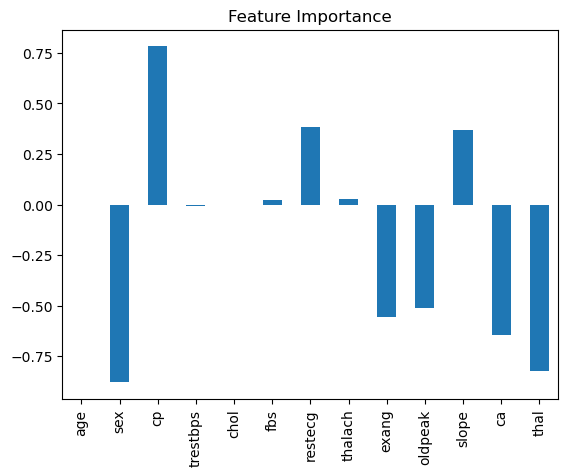

In [52]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance', legend=False)

plt.show()

In [53]:
pd.crosstab(data['sex'], data['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [54]:
pd.crosstab(data['slope'], data['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? (Like CatBoost or XGBoost)
* Coulf you imporve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?